In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv('../data/plays_with_passer_expanded_with_z_norm.csv', low_memory=False)
df.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,pass_forward_frame,ball_snap_frame,play_direction,frames_to_pass,seconds_since_pass,los_norm,start_x_norm,end_x_norm,start_y_norm,end_y_norm
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,36,11,left,25,2.5,40,33.10,46.71,26.33,6.83
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,31,11,left,20,2.0,40,34.39,43.69,23.62,16.91
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,34,11,left,23,2.3,40,34.49,37.41,24.64,47.49
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,39,11,left,28,2.8,40,30.60,61.83,26.24,41.47
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,31,11,left,20,2.0,40,33.52,41.95,28.86,10.88


In [2]:
df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'passer', 'v', 'vxy', 'vz', 'launch_angle', 'air_time', 'z_max',
       'distance', 'start_x', 'start_y', 'end_x', 'end_y',
       'pass_arrived_frame', 'pass_forward_frame', 'ball_snap_frame',
       'play_direction', 'frames_to_pass', 'seconds_since_pass', 'los_norm',
       'start_x_norm', 'end_x_norm', 'start_y_norm', 'end_y_norm'],
      dtype='object')

In [5]:
df = df.loc[df.air_time>0]

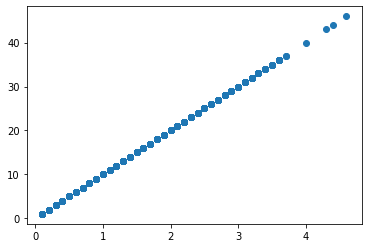

In [6]:
import matplotlib.pyplot as plt


plt.scatter(df.air_time, df.pass_arrived_frame-df.pass_forward_frame)
plt.show()

In [21]:
df.air_time.count()

17256

array([[<AxesSubplot:title={'center':'air_time'}>]], dtype=object)

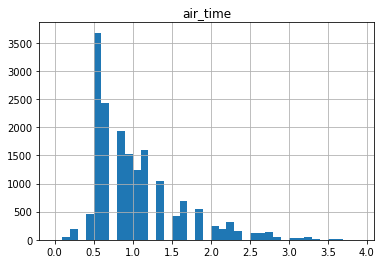

In [20]:
df.hist(column='air_time',bins=[0.1*x for x in range(40)])

In [12]:
df.air_time.describe()

count    17256.000000
mean         1.024988
std          0.556540
min          0.100000
25%          0.600000
50%          0.800000
75%          1.200000
max          4.600000
Name: air_time, dtype: float64

In [16]:
df.air_time.quantile([0.1*x for x in range(5, 10)]+[0.95, 0.99, 0.999])

0.500    0.8
0.600    1.0
0.700    1.1
0.800    1.4
0.900    1.8
0.950    2.2
0.990    2.9
0.999    3.5
Name: air_time, dtype: float64

In [19]:
df.loc[df.air_time>3.5][['passer', 'air_time', 'distance', 'passResult']]

,passer,air_time,distance,passResult
114,T.Taylor,3.6,59.155876,I
445,D.Watson,3.7,57.633873,I
2024,E.Manning,3.7,57.861410,I
2105,T.Taylor,3.6,61.493074,I
2421,C.Keenum,4.4,5.011846,IN
2723,J.Brissett,4.3,67.474976,I
3224,K.Cousins,3.6,3.703849,I
3495,A.Luck,3.6,61.663424,I
5084,P.Rivers,3.6,58.865536,I
11301,J.Allen,4.6,62.595120,I
